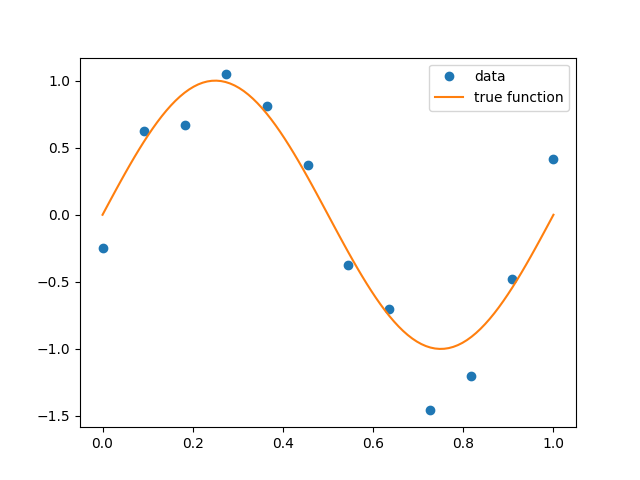

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as poly
import scipy.optimize as opt
%matplotlib widget

import sys
import os
sys.path.append(os.path.abspath('..'))
from week_5.fit import fit

def truefunc(x, a=0):
    return np.sin(2*np.pi*x)

x = np.linspace(0, 1, 12)
y = truefunc(x)

#add noise
y_noise = y + np.random.normal(0, 0.2, 12)

plt.figure()
plt.plot(x, y_noise, 'o', label='data')
plt.plot(np.linspace(0, 1, 100), truefunc(np.linspace(0, 1, 100)), label='true function')
plt.legend()



Text(0.5, 1.0, 'fit')

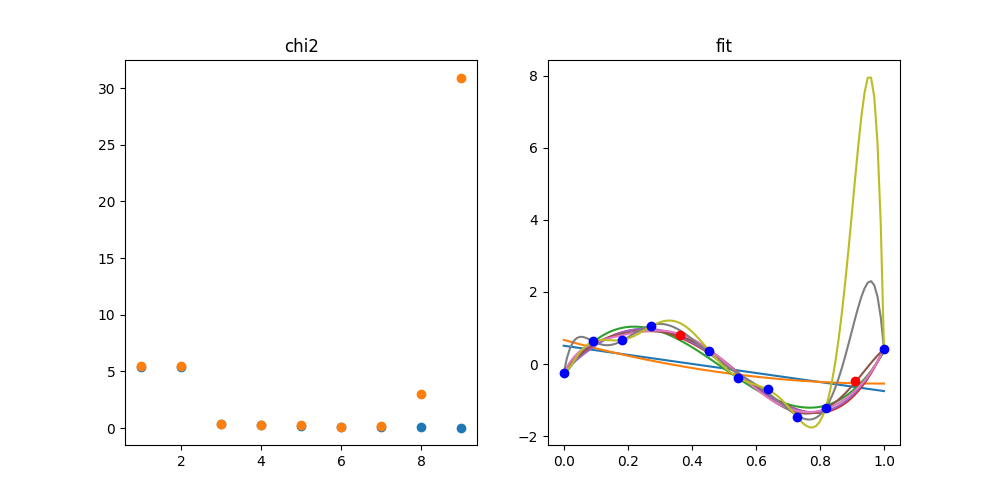

In [30]:
#calculate and test

def poly(x, a):
    return np.polyval(a, x)

def chi2(f, x, y, rho, a):
    return np.sum(((y - f(x, a))/rho)**2)

#use a few data points as check
ncheck = np.random.randint(0, len(x), 2)

#split data into training and test set
xtrain = np.delete(x, ncheck)
ytrain = np.delete(y_noise, ncheck)
xtest = x[ncheck]
ytest = y_noise[ncheck]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
chi2list = []
chi2listtest = []
for i in range(0, 9):
    n = i + 1
    ap = np.polyfit(x, y_noise, n)
    chi2list.append(chi2(poly, x, y_noise, 1, ap))
    ap2 = np.polyfit(xtrain, ytrain, n)
    chi2listtest.append(chi2(poly, x, y_noise, 1, ap2))
    
    ax[1].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), ap2), label='polyfit')

ax[1].plot(xtrain, ytrain, 'o', label='train', color="blue")
ax[1].plot(xtest, ytest, 'o', label='test', color="red")

ax[0].plot(np.arange(1, 10), chi2list, 'o', label='all data')
ax[0].plot(np.arange(1, 10), chi2listtest, 'o', label='training data')
ax[0].set_title("chi2")
ax[1].set_title("fit")



Fit  original function: 0.45677481634772893
step 23 chi2 3.203950505466603
step 20 chi2 3.2039528925699647
step 18 chi2 3.20418919157527
step 23 chi2 3.2039505293376394
step 25 chi2 3.096041778609786
step 23 chi2 3.0960498537980308
step 22 chi2 3.096848947724419
step 23 chi2 3.096041859361681
step 29 chi2 0.11227120708232846
step 25 chi2 0.11378069097208113
step 24 chi2 0.25551259583295005
step 31 chi2 0.11228630568446875
step 33 chi2 0.10040344360007668
step 27 chi2 0.10294235985808808
step 26 chi2 0.22588866012998024
step 29 chi2 0.10042906419703229
step 37 chi2 0.09896254970962104
step 33 chi2 0.10280185149130623
step 22 chi2 0.2204226684488252
step 43 chi2 0.09901113371847232
step 75 chi2 0.09894522039415314
step 29 chi2 0.10195676845889852
step 22 chi2 0.20873825949484237
step 49 chi2 0.09898287796658693
step 93 chi2 0.09849848309646375
step 25 chi2 0.10209666458422807
step 22 chi2 0.20091960136694767
step 45 chi2 0.09892766656797344
step 999 chi2 0.0807238851111861
step 29 chi2 0

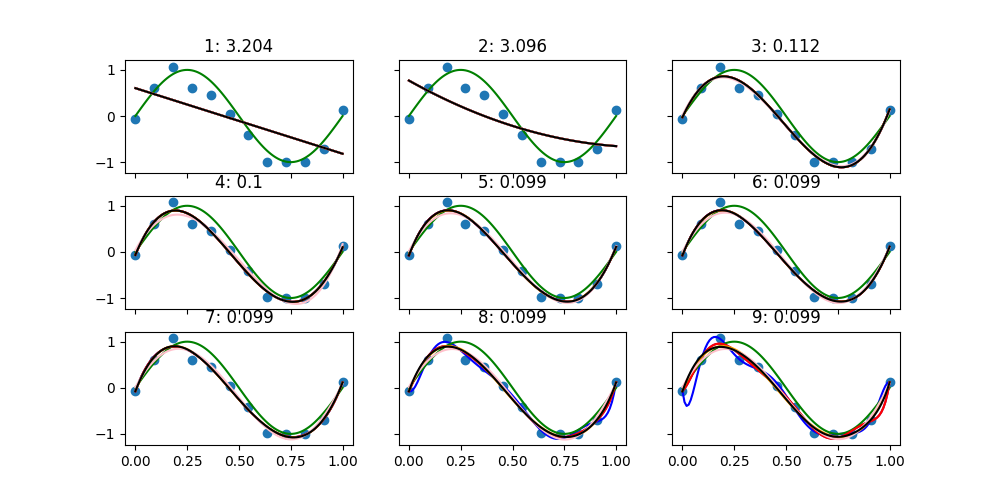

In [7]:
# fit function
def chi2(f, x, y, rho, a):
    return np.sum(((y - f(x, a))/rho)**2)

def chi2norm(f, x, y, rho, a, lam=1e-6):
    return np.sum(((y - f(x, a))/rho)**2) + lam*np.sum(a**2)



# polynomial function of degree n
def poly(x, a):
    return np.polyval(a, x)


print("Fit  original function:", chi2norm(truefunc, x, y_noise, 1, 1))



# plot everything

fig, ax = plt.subplots(3, 3, figsize=(10, 5), sharex=True, sharey=True)
#fig.tight_layout()


for i in range(3):
    for j in range(3):
        n = i*3 + j + 1
        a = opt.least_squares(lambda a: poly(x, a) - y_noise, np.zeros(n+1)).x
        ap = np.polyfit(x, y_noise, n)
        af = fit(poly, x, y_noise, np.ones(n+1), 1, chi2)
        anorm = fit(poly, x, y_noise, np.ones(n+1),1 , chi2norm)
        anorm2 = fit(poly, x, y_noise, np.ones(n+1), 1, lambda poly, x, y, rho, a: chi2norm(poly, x, y, rho, a, lam=1e-4))
        anorm3 = fit(poly, x, y_noise, np.ones(n+1), 1, lambda poly, x, y, rho, a: chi2norm(poly, x, y, rho, a, lam=1e-8))
        ax[i, j].plot(x, y_noise, 'o', label='data')
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), ap), label='polyfit', color="blue")
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), af), label='fit', color="purple")
        ax[i, j].plot(np.linspace(0, 1, 100), truefunc(np.linspace(0, 1, 100)), label='true function', color="green")
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), af), label='myfit', color="red")
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), anorm), label='myfit norm', color="orange")
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), anorm2), label='myfit norm2', color="pink")
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), anorm3), label='myfit norm3', color="black")
        ax[i, j].set_title(f"{n}: {np.round(chi2(poly, x, y_noise, 1, anorm), 3)}")
